In [1]:
import numpy as np 

import pandas as pd 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json 


from geopy.geocoders import Nominatim 

import requests 
from pandas.io.json import json_normalize 


import matplotlib.cm as cm
import matplotlib.colors as colors


from sklearn.cluster import KMeans

import folium

In [3]:
df=pd.read_html('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M', header=0)[0]
df = df[df.Borough != 'Not assigned']
df.pivot(index='Postal Code',columns='Neighborhood' )
df.head()

,Postal Code,Borough,Neighborhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
5,M6A,North York,"Lawrence Manor, Lawrence Heights"
6,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"


In [4]:
ll_df = pd.read_csv('//Users/ninomoreno/Downloads/Geospatial_Coordinates.csv')
ll_df.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [6]:
new_df = pd.merge(df, ll_df, how='inner', on = 'Postal Code')
new_df

,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494
5,M9A,Etobicoke,Islington Avenue,43.667856,-79.532242
6,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353
7,M3B,North York,Don Mills,43.745906,-79.352188
8,M4B,East York,"Parkview Hill, Woodbine Gardens",43.706397,-79.309937
9,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937


In [7]:
address = 'Toronto City, TOR'

geolocator = Nominatim(user_agent="TOR_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geographical coordinate of Toronto City are {}, {}.'.format(latitude, longitude))

map_toronto = folium.Map(location = [latitude, longitude], zoom_start = 10)
map_toronto

The geographical coordinate of Toronto City are 43.7627912, -79.4064452.


In [8]:
for lat, lng, borough, neighborhood in zip(new_df['Latitude'], new_df['Longitude'], new_df['Borough'], new_df['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

In [9]:
CLIENT_ID = 'IEDDFSOAF5NARER1XC4XJLD5Q2WZ5XU1V51ZD3DWTXDJ3ETG'
CLIENT_SECRET = 'T5FF4IPGCFPLKZSASPHIKQDS3KEQDG1LEKGLOZ4ZNB5T21Q0'
VERSION = '20180605'

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: IEDDFSOAF5NARER1XC4XJLD5Q2WZ5XU1V51ZD3DWTXDJ3ETG
CLIENT_SECRET:T5FF4IPGCFPLKZSASPHIKQDS3KEQDG1LEKGLOZ4ZNB5T21Q0


In [11]:
neighborhood_name=new_df.loc[0, 'Neighborhood']
neighborhood_lat=new_df.loc[0, 'Latitude']
neighborhood_long=new_df.loc[0, 'Longitude']


In [12]:
LIMIT = 100
radius = 500

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_lat, 
    neighborhood_long, 
    radius, 
    LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?&client_id=IEDDFSOAF5NARER1XC4XJLD5Q2WZ5XU1V51ZD3DWTXDJ3ETG&client_secret=T5FF4IPGCFPLKZSASPHIKQDS3KEQDG1LEKGLOZ4ZNB5T21Q0&v=20180605&ll=43.7532586,-79.3296565&radius=500&limit=100'

In [13]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5ec7bfcb6001fe001c7abeac'},
 'response': {'warning': {'text': "There aren't a lot of results near you. Try something more general, reset your filters, or expand the search area."},
  'headerLocation': 'Parkwoods - Donalda',
  'headerFullLocation': 'Parkwoods - Donalda, Toronto',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 2,
  'suggestedBounds': {'ne': {'lat': 43.757758604500005,
    'lng': -79.32343823984928},
   'sw': {'lat': 43.7487585955, 'lng': -79.33587476015072}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4e8d9dcdd5fbbbb6b3003c7b',
       'name': 'Brookbanks Park',
       'location': {'address': 'Toronto',
        'lat': 43.751976046055574,
        'lng': -79.33214044722958,
        'labeledLatLngs': 

In [14]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [15]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

/Users/ninomoreno/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  This is separate from the ipykernel package so we can avoid doing imports until


,name,categories,lat,lng
0,Brookbanks Park,Park,43.751976,-79.332140
1,Variety Store,Food & Drink Shop,43.751974,-79.333114


In [16]:
nearby_venues

,name,categories,lat,lng
0,Brookbanks Park,Park,43.751976,-79.332140
1,Variety Store,Food & Drink Shop,43.751974,-79.333114


In [17]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [18]:
toronto=getNearbyVenues(names = new_df['Neighborhood'], 
                latitudes = new_df['Latitude'],
                longitudes = new_df['Longitude'])

Parkwoods
Victoria Village
Regent Park, Harbourfront
Lawrence Manor, Lawrence Heights
Queen's Park, Ontario Provincial Government
Islington Avenue
Malvern, Rouge
Don Mills
Parkview Hill, Woodbine Gardens
Garden District, Ryerson
Glencairn
West Deane Park, Princess Gardens, Martin Grove, Islington, Cloverdale
Rouge Hill, Port Union, Highland Creek
Don Mills
Woodbine Heights
St. James Town
Humewood-Cedarvale
Eringate, Bloordale Gardens, Old Burnhamthorpe, Markland Wood
Guildwood, Morningside, West Hill
The Beaches
Berczy Park
Caledonia-Fairbanks
Woburn
Leaside
Central Bay Street
Christie
Cedarbrae
Hillcrest Village
Bathurst Manor, Wilson Heights, Downsview North
Thorncliffe Park
Richmond, Adelaide, King
Dufferin, Dovercourt Village
Scarborough Village
Fairview, Henry Farm, Oriole
Northwood Park, York University
East Toronto
Harbourfront East, Union Station, Toronto Islands
Little Portugal, Trinity
Kennedy Park, Ionview, East Birchmount Park
Bayview Village
Downsview
The Danforth West, Ri

In [19]:
toronto.shape

(2128, 7)

In [20]:
toronto.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Parkwoods,43.753259,-79.329656,Brookbanks Park,43.751976,-79.332140,Park
1,Parkwoods,43.753259,-79.329656,Variety Store,43.751974,-79.333114,Food & Drink Shop
2,Victoria Village,43.725882,-79.315572,Victoria Village Arena,43.723481,-79.315635,Hockey Arena
3,Victoria Village,43.725882,-79.315572,Tim Hortons,43.725517,-79.313103,Coffee Shop
4,Victoria Village,43.725882,-79.315572,Portugril,43.725819,-79.312785,Portuguese Restaurant


In [21]:
toronto.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Agincourt,4,4,4,4,4,4
"Alderwood, Long Branch",8,8,8,8,8,8
"Bathurst Manor, Wilson Heights, Downsview North",21,21,21,21,21,21
Bayview Village,4,4,4,4,4,4
"Bedford Park, Lawrence Manor East",24,24,24,24,24,24
Berczy Park,54,54,54,54,54,54
"Birch Cliff, Cliffside West",5,5,5,5,5,5
"Brockton, Parkdale Village, Exhibition Place",23,23,23,23,23,23
Business reply mail Processing Centre,17,17,17,17,17,17


In [22]:
print('There are {} unique categories'.format(len(toronto['Venue Category'].unique())))

There are 273 unique categories


In [23]:
#turning the categories to numbers/ one hot encoding
toronto_onehot = pd.get_dummies(toronto[['Venue Category']], prefix='', prefix_sep='')

# add neighborhood column back to dataframe
toronto_onehot['Neighborhood'] = toronto['Neighborhood']

#making the neighborhood column the first column
fixedColumns =[ toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixedColumns]

toronto_onehot.head()

,Yoga Studio,Accessories Store,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bike Shop,Bistro,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Auditorium,College Cafeteria,College Gym,College Rec Center,College Stadium,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Convention Center,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Curling Ice,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Financial or Legal Service,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hakka Restaurant,Harbor / Marina,Hardware Store,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hockey Arena,Home Service,Hookah Bar,Hospital,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indonesian Restaurant,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Kids Store,Korean Restaurant,Lake,Latin American Restaurant,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Luggage Store,Mac & Cheese Joint,Market,Martial Arts Dojo,Massage Studio,Medical Center,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Motel,Movie Theater,Moving Target,Museum,Music Venue,Neighborhood,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Plane,Playground,Plaza,Poke Place,Pool,Portuguese Restaurant,Post Office,Poutine Place,Print Shop,Pub,Ramen Restaurant,Record Shop,Recording Studio,Rental Car Location,Restaurant,River,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,Soup Place,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Sri Lankan Restaurant,Stadium,Stationery Store,Steakhouse,Strip Club,Supermarket,Supplement Shop,Sushi Restaurant,Swim School,Taco Place,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Restaurant,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wings Joint,Women's Store
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [29]:
toronto_onehot['Neighborhood'] = toronto['Neighborhood']
fixedColumns =[ toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixedColumns]

toronto_onehot.head()

,Neighborhood,Women's Store,Yoga Studio,Accessories Store,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bike Shop,Bistro,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Auditorium,College Cafeteria,College Gym,College Rec Center,College Stadium,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Convention Center,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Curling Ice,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Financial or Legal Service,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hakka Restaurant,Harbor / Marina,Hardware Store,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hockey Arena,Home Service,Hookah Bar,Hospital,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indonesian Restaurant,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Kids Store,Korean Restaurant,Lake,Latin American Restaurant,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Luggage Store,Mac & Cheese Joint,Market,Martial Arts Dojo,Massage Studio,Medical Center,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Motel,Movie Theater,Moving Target,Museum,Music Venue,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Plane,Playground,Plaza,Poke Place,Pool,Portuguese Restaurant,Post Office,Poutine Place,Print Shop,Pub,Ramen Restaurant,Record Shop,Recording Studio,Rental Car Location,Restaurant,River,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,Soup Place,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Sri Lankan Restaurant,Stadium,Stationery Store,Steakhouse,Strip Club,Supermarket,Supplement Shop,Sushi Restaurant,Swim School,Taco Place,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Restaurant,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wings Joint
0,Parkwoods,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [30]:
toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()
toronto_grouped

,Neighborhood,Women's Store,Yoga Studio,Accessories Store,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bike Shop,Bistro,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Auditorium,College Cafeteria,College Gym,College Rec Center,College Stadium,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Convention Center,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Curling Ice,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Financial or Legal Service,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hakka Restaurant,Harbor / Marina,Hardware Store,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hockey Arena,Home Service,Hookah Bar,Hospital,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indonesian Restaurant,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Kids Store,Korean Restaurant,Lake,Latin American Restaurant,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Luggage Store,Mac & Cheese Joint,Market,Martial Arts Dojo,Massage Studio,Medical Center,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Motel,Movie Theater,Moving Target,Museum,Music Venue,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Plane,Playground,Plaza,Poke Place,Pool,Portuguese Restaurant,Post Office,Poutine Place,Print Shop,Pub,Ramen Restaurant,Record Shop,Recording Studio,Rental Car Location,Restaurant,River,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,Soup Place,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Sri Lankan Restaurant,Stadium,Stationery Store,Steakhouse,Strip Club,Supermarket,Supplement Shop,Sushi Restaurant,Swim School,Taco Place,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Restaurant,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wings Joint
0,Agincourt,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,

In [31]:
num_top_venues = 5
for hood in toronto_grouped['Neighborhood']:
    print('----'+hood+'----')
    temp = toronto_grouped[toronto_grouped['Neighborhood']== hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print (temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Agincourt----
                       venue  freq
0                     Lounge  0.25
1               Skating Rink  0.25
2  Latin American Restaurant  0.25
3             Breakfast Spot  0.25
4                Men's Store  0.00


----Alderwood, Long Branch----
            venue  freq
0     Pizza Place  0.25
1             Gym  0.12
2  Sandwich Place  0.12
3     Coffee Shop  0.12
4            Pool  0.12


----Bathurst Manor, Wilson Heights, Downsview North----
                       venue  freq
0                Coffee Shop  0.10
1                       Bank  0.10
2                Pizza Place  0.05
3             Sandwich Place  0.05
4  Middle Eastern Restaurant  0.05


----Bayview Village----
                 venue  freq
0                 Café  0.25
1  Japanese Restaurant  0.25
2                 Bank  0.25
3   Chinese Restaurant  0.25
4  Moroccan Restaurant  0.00


----Bedford Park, Lawrence Manor East----
                venue  freq
0      Sandwich Place  0.08
1  Italian Restaurant  0.08

In [32]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [33]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

#creating columns to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except: 
        columns.append('{}th Most Common Venue'.format(ind+1))

#creating the dataframe
neighborhood_venues_sorted = pd.DataFrame(columns=columns)
neighborhood_venues_sorted['Neighborhood'] = toronto_grouped['Neighborhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhood_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighborhood_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Agincourt,Breakfast Spot,Latin American Restaurant,Skating Rink,Lounge,Doner Restaurant,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run
1,"Alderwood, Long Branch",Pizza Place,Pub,Pool,Coffee Shop,Gym,Pharmacy,Sandwich Place,Dance Studio,Deli / Bodega,Department Store
2,"Bathurst Manor, Wilson Heights, Downsview North",Coffee Shop,Bank,Middle Eastern Restaurant,Pharmacy,Shopping Mall,Diner,Bridal Shop,Restaurant,Deli / Bodega,Ice Cream Shop
3,Bayview Village,Japanese Restaurant,Café,Bank,Chinese Restaurant,Department Store,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Wings Joint
4,"Bedford Park, Lawrence Manor East",Coffee Shop,Sandwich Place,Italian Restaurant,Grocery Store,Sushi Restaurant,Comfort Food Restaurant,Pharmacy,Pizza Place,Café,Butcher


In [34]:
kclusters = 5

toronto_grouped_clustering = toronto_grouped.drop('Neighborhood', 1)

#running kmeans clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)

kmeans.labels_[0:10]

array([4, 0, 4, 4, 4, 4, 4, 4, 4, 4], dtype=int32)

In [35]:
neighborhood_venues_sorted.insert(0, 'Clustered Labels', kmeans.labels_)

toronto_merged = new_df

toronto_merged= toronto_merged.join(neighborhood_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

toronto_merged.head()

,Postal Code,Borough,Neighborhood,Latitude,Longitude,Clustered Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M3A,North York,Parkwoods,43.753259,-79.329656,1.0,Park,Food & Drink Shop,Discount Store,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Distribution Center,Event Space
1,M4A,North York,Victoria Village,43.725882,-79.315572,0.0,Financial or Legal Service,Portuguese Restaurant,Coffee Shop,Pizza Place,Hockey Arena,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636,4.0,Coffee Shop,Pub,Park,Bakery,Breakfast Spot,Café,Theater,Spa,Restaurant,Bank
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763,4.0,Clothing Store,Women's Store,Vietnamese Restaurant,Accessories Store,Boutique,Event Space,Coffee Shop,Miscellaneous Shop,Furniture / Home Store,Discount Store
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494,4.0,Coffee Shop,Sushi Restaurant,College Cafeteria,Bank,Beer Bar,Smoothie Shop,Sandwich Place,Burger Joint,Burrito Place,Café


In [39]:
toronto_merged['Clustered Labels']=toronto_merged['Clustered Labels'].dropna()

In [42]:
toronto_merged=toronto_merged.dropna()
toronto_merged

,Postal Code,Borough,Neighborhood,Latitude,Longitude,Clustered Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M3A,North York,Parkwoods,43.753259,-79.329656,1.0,Park,Food & Drink Shop,Discount Store,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Distribution Center,Event Space
1,M4A,North York,Victoria Village,43.725882,-79.315572,0.0,Financial or Legal Service,Portuguese Restaurant,Coffee Shop,Pizza Place,Hockey Arena,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636,4.0,Coffee Shop,Pub,Park,Bakery,Breakfast Spot,Café,Theater,Spa,Restaurant,Bank
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763,4.0,Clothing Store,Women's Store,Vietnamese Restaurant,Accessories Store,Boutique,Event Space,Coffee Shop,Miscellaneous Shop,Furniture / Home Store,Discount Store
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494,4.0,Coffee Shop,Sushi Restaurant,College Cafeteria,Bank,Beer Bar,Smoothie Shop,Sandwich Place,Burger Joint,Burrito Place,Café
6,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353,2.0,Fast Food Restaurant,Print Shop,Wings Joint,Distribution Center,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dog Run
7,M3B,North York,Don Mills,43.745906,-79.352188,4.0,Beer Store,Restaurant,Café,Gym,Coffee Shop,Asian Restaurant,Japanese Restaurant,Sporting Goods Shop,Supermarket,Italian Restaurant
8,M4B,East York,"Parkview Hill, Woodbine Gardens",43.706397,-79.309937,0.0,Pizza Place,Café,Bank,Gym / Fitness Center,Fast Food Restaurant,Pharmacy,Athletics & Sports,Gastropub,Intersection,Diner
9,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937,4.0,Clothing Store,Coffee Shop,Café,Bubble Tea Shop,Cosmetics Shop,Restaurant,Middle Eastern Restaurant,Italian Restaurant,Japanese Restaurant,Tea Room
10,M6B,North York,Glencairn,43.709577,-79.445073,4.0,Park,Japanese Restaurant,Pub,Sushi Restaurant,Drugstore,Donut Shop,Doner Restaurant,Dog Run,Eastern European Restaurant,Dance Studio


In [44]:
toronto_merged['Clustered Labels'] = toronto_merged['Clustered Labels'].astype(int)

/Users/ninomoreno/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [45]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighborhood'], toronto_merged['Clustered Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [46]:
toronto_merged.loc[toronto_merged['Clustered Labels']==0, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Clustered Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,North York,0,Financial or Legal Service,Portuguese Restaurant,Coffee Shop,Pizza Place,Hockey Arena,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner
8,East York,0,Pizza Place,Café,Bank,Gym / Fitness Center,Fast Food Restaurant,Pharmacy,Athletics & Sports,Gastropub,Intersection,Diner
29,East York,0,Indian Restaurant,Sandwich Place,Grocery Store,Burger Joint,Supermarket,Intersection,Fast Food Restaurant,Pizza Place,Pharmacy,Bus Line
50,North York,0,Gym,Pizza Place,Wings Joint,Dog Run,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center
56,York,0,Sandwich Place,Restaurant,Coffee Shop,Discount Store,Wings Joint,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Distribution Center
59,North York,0,Coffee Shop,Pizza Place,Ramen Restaurant,Grocery Store,Sandwich Place,Café,Bank,Hotel,Ice Cream Shop,Indonesian Restaurant
63,York,0,Grocery Store,Convenience Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Deli / Bodega
65,Scarborough,0,Indian Restaurant,Chinese Restaurant,Vietnamese Restaurant,Pet Store,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store
70,Etobicoke,0,Pizza Place,Sandwich Place,Coffee Shop,Intersection,Discount Store,Chinese Restaurant,Wings Joint,Department Store,Dessert Shop,Dim Sum Restaurant
72,North York,0,Coffee Shop,Pizza Place,Ramen Restaurant,Grocery Store,Sandwich Place,Café,Bank,Hotel,Ice Cream Shop,Indonesian Restaurant


In [47]:
toronto_merged.loc[toronto_merged['Clustered Labels']==1, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Clustered Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,North York,1,Park,Food & Drink Shop,Discount Store,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Distribution Center,Event Space
21,York,1,Park,Pool,Women's Store,College Rec Center,College Stadium,Ethiopian Restaurant,Electronics Store,Eastern European Restaurant,Drugstore,Donut Shop
35,East York,1,Park,Metro Station,Convenience Store,Electronics Store,Eastern European Restaurant,Drugstore,Donut Shop,Doner Restaurant,Dog Run,Deli / Bodega
61,Central Toronto,1,Park,Bus Line,Swim School,Eastern European Restaurant,Drugstore,Donut Shop,Doner Restaurant,Dog Run,Dance Studio,Discount Store
64,York,1,Park,Distribution Center,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dog Run,Greek Restaurant
66,North York,1,Park,Bank,Convenience Store,Ethiopian Restaurant,Electronics Store,Eastern European Restaurant,Drugstore,Donut Shop,Doner Restaurant,Deli / Bodega
77,Etobicoke,1,Park,Sandwich Place,Mobile Phone Shop,Discount Store,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Distribution Center
83,Central Toronto,1,Park,Restaurant,Trail,Diner,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Discount Store
85,Scarborough,1,Park,Playground,Distribution Center,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dog Run
91,Downtown Toronto,1,Park,Playground,Trail,Discount Store,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner


In [48]:
toronto_merged.loc[toronto_merged['Clustered Labels']==2, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Clustered Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,Scarborough,2,Fast Food Restaurant,Print Shop,Wings Joint,Distribution Center,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dog Run


In [49]:
toronto_merged.loc[toronto_merged['Clustered Labels']==3, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Clustered Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
57,North York,3,Baseball Field,Doner Restaurant,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Wings Joint,Farm
101,Etobicoke,3,Baseball Field,Construction & Landscaping,Wings Joint,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop


In [50]:
toronto_merged.loc[toronto_merged['Clustered Labels']==4, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Clustered Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,Downtown Toronto,4,Coffee Shop,Pub,Park,Bakery,Breakfast Spot,Café,Theater,Spa,Restaurant,Bank
3,North York,4,Clothing Store,Women's Store,Vietnamese Restaurant,Accessories Store,Boutique,Event Space,Coffee Shop,Miscellaneous Shop,Furniture / Home Store,Discount Store
4,Downtown Toronto,4,Coffee Shop,Sushi Restaurant,College Cafeteria,Bank,Beer Bar,Smoothie Shop,Sandwich Place,Burger Joint,Burrito Place,Café
7,North York,4,Beer Store,Restaurant,Café,Gym,Coffee Shop,Asian Restaurant,Japanese Restaurant,Sporting Goods Shop,Supermarket,Italian Restaurant
9,Downtown Toronto,4,Clothing Store,Coffee Shop,Café,Bubble Tea Shop,Cosmetics Shop,Restaurant,Middle Eastern Restaurant,Italian Restaurant,Japanese Restaurant,Tea Room
10,North York,4,Park,Japanese Restaurant,Pub,Sushi Restaurant,Drugstore,Donut Shop,Doner Restaurant,Dog Run,Eastern European Restaurant,Dance Studio
12,Scarborough,4,Bar,Moving Target,Wings Joint,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Deli / Bodega
13,North York,4,Beer Store,Restaurant,Café,Gym,Coffee Shop,Asian Restaurant,Japanese Restaurant,Sporting Goods Shop,Supermarket,Italian Restaurant
14,East York,4,Park,Cosmetics Shop,Beer Store,Spa,Diner,Skating Rink,Curling Ice,Athletics & Sports,Pharmacy,Concert Hall
15,Downtown Toronto,4,Coffee Shop,Café,Cocktail Bar,Gastropub,American Restaurant,Gym,Italian Restaurant,Lingerie Store,Department Store,Creperie


# Makati City Data

In [51]:
makati_df = pd.read_html("https://postalandzipcodes.ph/search-result?q=Makati")[0]
makati_df = makati_df.drop(columns="Phone Area Code", axis=1)
makati_df = makati_df.drop(columns="Region Name", axis=1)
makati_df = makati_df.drop(columns="City Name", axis=1)
makati_df.rename(columns={"Barangay/Town" : "Place Name"}, inplace=True)
makati_df

,Place Name,Postal/Zip Code
0,"Makati CPO Inc, Buendia",1200
1,Rembo East and Malapad Na Bato,1216
2,Palanan,1235
3,"Pasong Tamo 2000 Up, Ecology V",1231
4,Pembo,1218
5,Pinagkaisahan pitogo,1213
6,Pio Del Pilar,1230
7,Poblacion,1210
8,Rembo West,1215
9,Commercial Center,1224


In [52]:
pcodes_df = pd.read_csv("//Users/ninomoreno/Downloads/ph_postal_codes.csv",encoding = "ISO-8859-1")
pcodes_df

,Postal Codes,Place Name,Latitude,Longitude
0,0400,International Correspondence School,NaN,NaN
1,0401,Asian Development Bank,NaN,NaN
2,0410,Radio Bible Class,NaN,NaN
3,0420,Bible School on the Air,NaN,NaN
4,0550,Febias College of Bible,NaN,NaN
5,0560,Far East Broadcasting Corporation,NaN,NaN
6,0800,Social Security System,NaN,NaN
7,0801,Camp Crame,NaN,NaN
8,0802,Camp Aguinaldo,NaN,NaN
9,0810,Araneta Center,NaN,NaN


In [54]:
newmak_df = pd.merge(pcodes_df, makati_df, how='inner', on = "Place Name")
newmak_df= newmak_df.drop_duplicates('Place Name')
newmak_df = newmak_df.drop(columns = "Postal/Zip Code")
newmak_df 

,Postal Codes,Place Name,Latitude,Longitude
0,1113,San Isidro,15.0500,120.7500
11,1206,Kasilawan,14.5728,121.0147
12,1210,Poblacion,14.5432,121.0691
14,1214,Cembo,14.5646,121.0488
15,1217,Comembo,14.5477,121.0613
16,1218,Pembo,14.5384,121.0606
17,1219,Forbes Park North,14.5504,121.0602
18,1220,Forbes Park South,14.2530,121.6374
19,1223,San Lorenzo Village,14.2530,121.6374
20,1225,Urdaneta Village,14.2530,121.6374


In [55]:
#Since values are not that specific I would then use Google maps to get more accurate coordinates

Latitude_mak = [14.552752,14.576784,14.567312,14.559831, 14.547640,14.543703,14.551227,14.545648,
           14.550912,14.555648,14.559510,14.552964,14.555433,14.534683,14.543745,14.559812] 
Longitude_mak = [121.005762,121.014719,121.030795,121.049991, 121.064575,121.057884,121.035266,121.038343,
            121.020156,121.029599,121.020458,121.021013,121.016936,121.018189,121.013699,121.003160]
newmak_df["Latitude"]=Latitude_mak
newmak_df["Longitude"]=Longitude_mak

newmak_df



,Postal Codes,Place Name,Latitude,Longitude
0,1113,San Isidro,14.552752,121.005762
11,1206,Kasilawan,14.576784,121.014719
12,1210,Poblacion,14.567312,121.030795
14,1214,Cembo,14.559831,121.049991
15,1217,Comembo,14.547640,121.064575
16,1218,Pembo,14.543703,121.057884
17,1219,Forbes Park North,14.551227,121.035266
18,1220,Forbes Park South,14.545648,121.038343
19,1223,San Lorenzo Village,14.550912,121.020156
20,1225,Urdaneta Village,14.555648,121.029599


In [57]:
address = "Makati City"

geolocator = Nominatim(user_agent="MAK_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

print("The cooridnates of Makati City is {}, {}".format(latitude, longitude))

map_makati = folium.Map(location = [latitude, longitude], zoom_start = 12)
map_makati

The cooridnates of Makati City is 14.5568853, 121.023532


In [58]:
for lat, lng, neighborhood in zip(newmak_df['Latitude'], newmak_df['Longitude'], newmak_df['Place Name']):
    label = 'Barangay/Town:{}, Lat: {}, Long: {}'.format(neighborhood, lat, lng)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_makati)  
    
map_makati

In [59]:
makneighborhood_name=newmak_df.loc[0, 'Place Name']
makneighborhood_lat=newmak_df.loc[0, 'Latitude']
makneighborhood_long=newmak_df.loc[0, 'Longitude']

In [60]:
#For the sake of organization, I added MAK/mak for makati variables
MAKurl = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    makneighborhood_lat, 
    makneighborhood_long, 
    radius, 
    LIMIT)
MAKurl

'https://api.foursquare.com/v2/venues/explore?&client_id=IEDDFSOAF5NARER1XC4XJLD5Q2WZ5XU1V51ZD3DWTXDJ3ETG&client_secret=T5FF4IPGCFPLKZSASPHIKQDS3KEQDG1LEKGLOZ4ZNB5T21Q0&v=20180605&ll=14.552752,121.005762&radius=500&limit=100'

In [61]:
makresults = requests.get(MAKurl).json()
makresults

{'meta': {'code': 200, 'requestId': '5ec7f0911d67cb00283e6809'},
 'response': {'headerLocation': 'San Isidro',
  'headerFullLocation': 'San Isidro, Makati City',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 10,
  'suggestedBounds': {'ne': {'lat': 14.557252004500004,
    'lng': 121.01040248450451},
   'sw': {'lat': 14.548251995499996, 'lng': 121.0011215154955}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '571a0015498e040231d23dfc',
       'name': "Shakey's",
       'location': {'address': '63 Sen Gil Puyat Ave',
        'crossStreet': 'btwn Dian & Batangas Sts',
        'lat': 14.556525751623399,
        'lng': 121.00491573710251,
        'labeledLatLngs': [{'label': 'display',
          'lat': 14.556525751623399,
          'lng': 121.0049157371025

In [62]:
makvenues = makresults['response']['groups'][0]['items']
    
maknearby_venues = json_normalize(makvenues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
maknearby_venues =maknearby_venues.loc[:, filtered_columns]

# filter the category for each row
maknearby_venues['venue.categories'] = maknearby_venues.apply(get_category_type, axis=1)

# clean columns
maknearby_venues.columns = [col.split(".")[-1] for col in maknearby_venues.columns]

maknearby_venues.head()

/Users/ninomoreno/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  This is separate from the ipykernel package so we can avoid doing imports until


,name,categories,lat,lng
0,Shakey's,Pizza Place,14.556526,121.004916
1,National Book Store,Bookstore,14.554814,121.006325
2,McDonald's,Fast Food Restaurant,14.552937,121.007451
3,Mercury Drug,Pharmacy,14.556107,121.003986
4,Ramen Metro,Ramen Restaurant,14.556024,121.005503


In [64]:
#I will be using the same get nearby functions
makati = getNearbyVenues(names = newmak_df['Place Name'], 
                         latitudes = newmak_df["Latitude"], 
                         longitudes = newmak_df["Longitude"])

San Isidro
Kasilawan
Poblacion
Cembo
Comembo
Pembo
Forbes Park North
Forbes Park South
San Lorenzo Village
Urdaneta Village
Salcedo Village
Greenbelt
Legaspi Village
Magallanes Village
Bangkal
Palanan


In [65]:
makati.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Bangkal,42,42,42,42,42,42
Cembo,19,19,19,19,19,19
Comembo,21,21,21,21,21,21
Forbes Park North,24,24,24,24,24,24
Forbes Park South,24,24,24,24,24,24
Greenbelt,100,100,100,100,100,100
Kasilawan,9,9,9,9,9,9
Legaspi Village,57,57,57,57,57,57
Magallanes Village,34,34,34,34,34,34


In [66]:
makati_onehot = pd.get_dummies(makati[['Venue Category']], prefix='', prefix_sep='')

# add neighborhood column back to dataframe
makati_onehot['Neighborhood'] = makati['Neighborhood']

#making the neighborhood column the first column
fixedColumns =[ makati_onehot.columns[-1]] + list(makati_onehot.columns[:-1])
makati_onehot = makati_onehot[fixedColumns]

makati_onehot.head()

,Neighborhood,American Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,BBQ Joint,Bakery,Bar,Basketball Court,Bookstore,Boutique,Bowling Alley,Boxing Gym,Breakfast Spot,Bubble Tea Shop,Buffet,Burger Joint,Bus Station,Bus Stop,Café,Cantonese Restaurant,Chinese Restaurant,Chocolate Shop,Clothing Store,Cocktail Bar,Coffee Shop,Comfort Food Restaurant,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Deli / Bodega,Department Store,Dessert Shop,Diner,Donut Shop,Drugstore,Dumpling Restaurant,Electronics Store,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish Market,Food & Drink Shop,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Gas Station,Gastropub,Golf Course,Greek Restaurant,Grocery Store,Gun Range,Gym,Gym / Fitness Center,Hardware Store,Health & Beauty Service,Health Food Store,History Museum,Hostel,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Intersection,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Karaoke Bar,Korean Restaurant,Latin American Restaurant,Lounge,Massage Studio,Mattress Store,Medical Center,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Mongolian Restaurant,Movie Theater,Multiplex,Music Venue,New American Restaurant,Nightclub,Nursery School,Office,Okonomiyaki Restaurant,Organic Grocery,Paella Restaurant,Park,Perfume Shop,Pet Service,Pet Store,Pharmacy,Pizza Place,Playground,Plaza,Portuguese Restaurant,Pub,Public Art,Ramen Restaurant,Recreation Center,Residential Building (Apartment / Condo),Resort,Restaurant,Roof Deck,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shop & Service,Shopping Mall,Snack Place,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Bar,Steakhouse,Supermarket,Sushi Restaurant,Taco Place,Tapas Restaurant,Tea Room,Tex-Mex Restaurant,Thai Restaurant,Theme Restaurant,Tonkatsu Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,San Isidro,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,San Isidro,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,San Isidro,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,San Isidro,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,San Isidro,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [67]:
makati_grouped = makati_onehot.groupby('Neighborhood').mean().reset_index()
makati_grouped

,Neighborhood,American Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,BBQ Joint,Bakery,Bar,Basketball Court,Bookstore,Boutique,Bowling Alley,Boxing Gym,Breakfast Spot,Bubble Tea Shop,Buffet,Burger Joint,Bus Station,Bus Stop,Café,Cantonese Restaurant,Chinese Restaurant,Chocolate Shop,Clothing Store,Cocktail Bar,Coffee Shop,Comfort Food Restaurant,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Deli / Bodega,Department Store,Dessert Shop,Diner,Donut Shop,Drugstore,Dumpling Restaurant,Electronics Store,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish Market,Food & Drink Shop,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Gas Station,Gastropub,Golf Course,Greek Restaurant,Grocery Store,Gun Range,Gym,Gym / Fitness Center,Hardware Store,Health & Beauty Service,Health Food Store,History Museum,Hostel,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Intersection,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Karaoke Bar,Korean Restaurant,Latin American Restaurant,Lounge,Massage Studio,Mattress Store,Medical Center,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Mongolian Restaurant,Movie Theater,Multiplex,Music Venue,New American Restaurant,Nightclub,Nursery School,Office,Okonomiyaki Restaurant,Organic Grocery,Paella Restaurant,Park,Perfume Shop,Pet Service,Pet Store,Pharmacy,Pizza Place,Playground,Plaza,Portuguese Restaurant,Pub,Public Art,Ramen Restaurant,Recreation Center,Residential Building (Apartment / Condo),Resort,Restaurant,Roof Deck,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shop & Service,Shopping Mall,Snack Place,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Bar,Steakhouse,Supermarket,Sushi Restaurant,Taco Place,Tapas Restaurant,Tea Room,Tex-Mex Restaurant,Thai Restaurant,Theme Restaurant,Tonkatsu Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,Bangkal,0.023810,0.071429,0.000000,0.000000,0.000000,0.000000,0.000000,0.047619,0.000000,0.047619,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.023810,0.000000,0.047619,0.000000,0.000000,0.023810,0.000000,0.047619,0.000000,0.000000,0.047619,0.000000,0.000000,0.119048,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.023810,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.023810,0.000000,0.000000,0.000000,0.023810,0.000000,0.000000,0.000000,0.000000,0.000000,0.047619,0.000000,0.000000,0.023810,0.000000,0.000000,0.000000,0.000000,0.047619,0.023810,0.02381,0.00,0.000000,0.000000,0.000000,0.023810,0.000000,0.000000,0.000000,0.000000,0.000000,0.023810,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.047619,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.023810,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.02381,0.047619,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.023810,0.000000,0.000000,0.000000,0.000000,0.000000,0.023810,0.000000,0.000000,0.000000,0.000000,0.000000,0.02381,0.000000,0.000000,0.000000,0.000000,0.000000
1,Cembo,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.105263,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.052632,0.000000,0.000000,0.000000,0.000000,0.105263,0.000000,0.157895,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.052632,0.052632,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0

In [68]:
num_top_venues = 5
for hood in makati_grouped['Neighborhood']:
    print('----'+hood+'----')
    temp = makati_grouped[makati_grouped['Neighborhood']== hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print (temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Bangkal----
                    venue  freq
0       Convenience Store  0.12
1             Art Gallery  0.07
2      Chinese Restaurant  0.05
3            Burger Joint  0.05
4  Furniture / Home Store  0.05


----Cembo----
               venue  freq
0  Convenience Store  0.16
1          Gastropub  0.11
2        Coffee Shop  0.11
3     Breakfast Spot  0.11
4          Nightclub  0.05


----Comembo----
                  venue  freq
0  Fast Food Restaurant  0.19
1                  Café  0.14
2     Convenience Store  0.14
3                 Diner  0.10
4      Tapas Restaurant  0.05


----Forbes Park North----
                 venue  freq
0  American Restaurant  0.04
1             Bus Stop  0.04
2          Coffee Shop  0.04
3        Deli / Bodega  0.04
4         Dessert Shop  0.04


----Forbes Park South----
                 venue  freq
0               Lounge  0.08
1                 Café  0.08
2  Japanese Restaurant  0.08
3   Italian Restaurant  0.08
4        Deli / Bodega  0.08


----Greenb

In [69]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

#creating columns to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except: 
        columns.append('{}th Most Common Venue'.format(ind+1))

#creating the dataframe
makneighborhood_venues_sorted = pd.DataFrame(columns=columns)
makneighborhood_venues_sorted['Neighborhood'] = makati_grouped['Neighborhood']

for ind in np.arange(makati_grouped.shape[0]):
    makneighborhood_venues_sorted.iloc[ind, 1:] = return_most_common_venues(makati_grouped.iloc[ind, :], num_top_venues)

makneighborhood_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bangkal,Convenience Store,Art Gallery,Chinese Restaurant,Restaurant,Gym,Cocktail Bar,Furniture / Home Store,BBQ Joint,Burger Joint,Bar
1,Cembo,Convenience Store,Breakfast Spot,Coffee Shop,Gastropub,Pet Store,Fast Food Restaurant,Latin American Restaurant,Scenic Lookout,Nightclub,Korean Restaurant
2,Comembo,Fast Food Restaurant,Convenience Store,Café,Diner,Plaza,Tapas Restaurant,Cosmetics Shop,Fish Market,Grocery Store,Pharmacy
3,Forbes Park North,Indian Restaurant,Plaza,Men's Store,Japanese Restaurant,Italian Restaurant,Intersection,Gym / Fitness Center,Grocery Store,Golf Course,Food Truck
4,Forbes Park South,Deli / Bodega,Lounge,Japanese Restaurant,Italian Restaurant,Café,Coffee Shop,Field,Grocery Store,Filipino Restaurant,Indian Restaurant


In [79]:
kclusters = 5

makati_grouped_clustering = makati_grouped.drop('Neighborhood', 1)

#running kmeans clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(makati_grouped_clustering)

kmeans.labels_[0:10]

array([1, 0, 2, 1, 1, 1, 4, 1, 1, 1], dtype=int32)

In [80]:
makneighborhood_venues_sorted.insert(0, 'Clustered Labels', kmeans.labels_)

makati_merged = newmak_df

makati_merged= makati_merged.join(makneighborhood_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

makati_merged.head()

,Postal Codes,Neighborhood,Latitude,Longitude,Clustered Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,1113,San Isidro,14.552752,121.005762,3,Fast Food Restaurant,Pizza Place,Ramen Restaurant,Chinese Restaurant,Bookstore,Convenience Store,Food Court,Pharmacy,Health & Beauty Service,Dumpling Restaurant
11,1206,Kasilawan,14.576784,121.014719,4,Convenience Store,Supermarket,Food Truck,Asian Restaurant,Athletics & Sports,Bakery,Fast Food Restaurant,Shop & Service,Fried Chicken Joint,French Restaurant
12,1210,Poblacion,14.567312,121.030795,1,Korean Restaurant,Hostel,Ramen Restaurant,Spa,Bubble Tea Shop,Mexican Restaurant,Coffee Shop,Café,Indian Restaurant,Diner
14,1214,Cembo,14.559831,121.049991,0,Convenience Store,Breakfast Spot,Coffee Shop,Gastropub,Pet Store,Fast Food Restaurant,Latin American Restaurant,Scenic Lookout,Nightclub,Korean Restaurant
15,1217,Comembo,14.547640,121.064575,2,Fast Food Restaurant,Convenience Store,Café,Diner,Plaza,Tapas Restaurant,Cosmetics Shop,Fish Market,Grocery Store,Pharmacy


In [81]:
makmap_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(makati_merged['Latitude'], makati_merged['Longitude'], makati_merged['Neighborhood'], makati_merged['Clustered Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(makmap_clusters)
       
makmap_clusters

In [82]:
#Cluster 1
makati_merged.loc[makati_merged['Clustered Labels']==0, makati_merged.columns[[1] + list(range(5, makati_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
14,Cembo,Convenience Store,Breakfast Spot,Coffee Shop,Gastropub,Pet Store,Fast Food Restaurant,Latin American Restaurant,Scenic Lookout,Nightclub,Korean Restaurant


In [83]:
#Cluster 2
makati_merged.loc[makati_merged['Clustered Labels']==1, makati_merged.columns[[1] + list(range(5, makati_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
12,Poblacion,Korean Restaurant,Hostel,Ramen Restaurant,Spa,Bubble Tea Shop,Mexican Restaurant,Coffee Shop,Café,Indian Restaurant,Diner
17,Forbes Park North,Indian Restaurant,Plaza,Men's Store,Japanese Restaurant,Italian Restaurant,Intersection,Gym / Fitness Center,Grocery Store,Golf Course,Food Truck
18,Forbes Park South,Deli / Bodega,Lounge,Japanese Restaurant,Italian Restaurant,Café,Coffee Shop,Field,Grocery Store,Filipino Restaurant,Indian Restaurant
19,San Lorenzo Village,Café,Shopping Mall,Japanese Restaurant,Boutique,Clothing Store,Italian Restaurant,Spa,Filipino Restaurant,Frozen Yogurt Shop,Cosmetics Shop
20,Urdaneta Village,Hotel,Department Store,Burger Joint,Dessert Shop,Coworking Space,Filipino Restaurant,Restaurant,Coffee Shop,Food Court,Modern European Restaurant
21,Salcedo Village,Coffee Shop,Yoga Studio,Filipino Restaurant,Café,Park,Sandwich Place,Japanese Restaurant,Salad Place,Restaurant,Gym
22,Greenbelt,Café,Hotel,Japanese Restaurant,Clothing Store,Boutique,Shopping Mall,Filipino Restaurant,Spa,Italian Restaurant,Cosmetics Shop
23,Legaspi Village,Japanese Restaurant,Spa,Coffee Shop,Café,Bakery,Bar,Chinese Restaurant,Restaurant,Massage Studio,New American Restaurant
24,Magallanes Village,Diner,Bar,Café,Pizza Place,Coffee Shop,Convenience Store,Mattress Store,Office,Salad Place,Food & Drink Shop
25,Bangkal,Convenience Store,Art Gallery,Chinese Restaurant,Restaurant,Gym,Cocktail Bar,Furniture / Home Store,BBQ Joint,Burger Joint,Bar


In [84]:
#Cluster 3
makati_merged.loc[makati_merged['Clustered Labels']==2, makati_merged.columns[[1] + list(range(5, makati_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
15,Comembo,Fast Food Restaurant,Convenience Store,Café,Diner,Plaza,Tapas Restaurant,Cosmetics Shop,Fish Market,Grocery Store,Pharmacy
16,Pembo,Convenience Store,Coffee Shop,Pharmacy,Karaoke Bar,Bus Station,Lounge,Café,Bookstore,Basketball Court,Bakery


In [85]:
#Cluster 4
makati_merged.loc[makati_merged['Clustered Labels']==3, makati_merged.columns[[1] + list(range(5, makati_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,San Isidro,Fast Food Restaurant,Pizza Place,Ramen Restaurant,Chinese Restaurant,Bookstore,Convenience Store,Food Court,Pharmacy,Health & Beauty Service,Dumpling Restaurant


In [86]:
#Cluster 5
makati_merged.loc[makati_merged['Clustered Labels']==4, makati_merged.columns[[1] + list(range(5, makati_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
11,Kasilawan,Convenience Store,Supermarket,Food Truck,Asian Restaurant,Athletics & Sports,Bakery,Fast Food Restaurant,Shop & Service,Fried Chicken Joint,French Restaurant


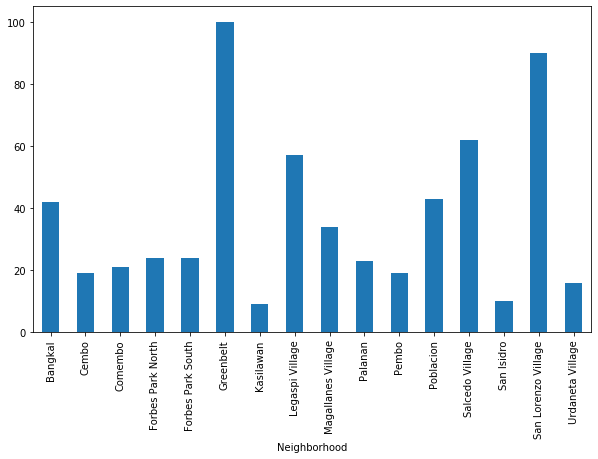

In [101]:
import matplotlib.pyplot as plt
num_of_venuesmakmak=makati.groupby('Neighborhood').count()
num_of_venuesmakmak=num_of_venuesmakmak["Venue"]
num_of_venuesmakmak.plot(kind='bar', figsize=(10,6))

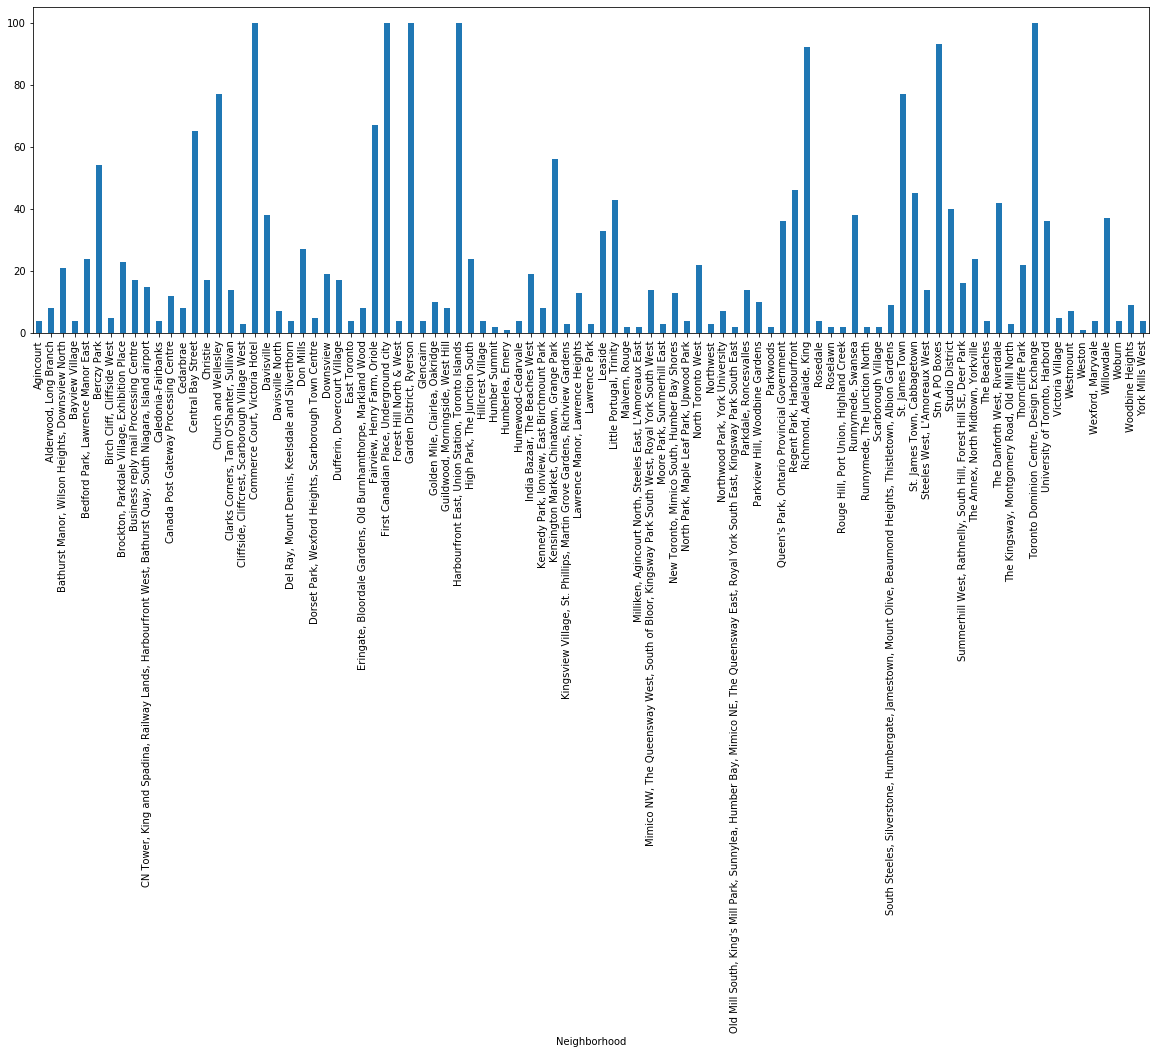

In [105]:
num_of_venuestortor=toronto.groupby('Neighborhood').count()
num_of_venuestortor=num_of_venuestortor['Venue']
num_of_venuestortor.plot(kind='bar', figsize=(20,6))

Text(0.5, 1.0, 'Number of first common venues')

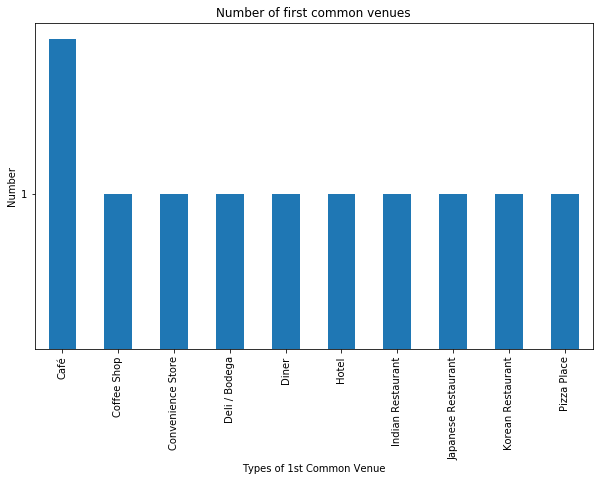

In [126]:
cluster_two = makati_merged.loc[makati_merged['Clustered Labels']==1, makati_merged.columns[[1] + list(range(5, makati_merged.shape[1]))]]
cluster_two_first=cluster_two['1st Most Common Venue']
cluster_two_first = pd.get_dummies(cluster_two_first)
cluster_two_first=cluster_two_first.sum()
cluster_two_first.plot(kind='bar', figsize=(10,6))

plt.yticks(np.arange(cluster_two_first.min(),cluster_two_first.max(),3))
plt.xlabel('Types of 1st Common Venue')
plt.ylabel('Number')
plt.title('Number of first common venues')

([<matplotlib.axis.YTick at 0x1a1e60b890>,
 <a list of 17 Text yticklabel objects>)

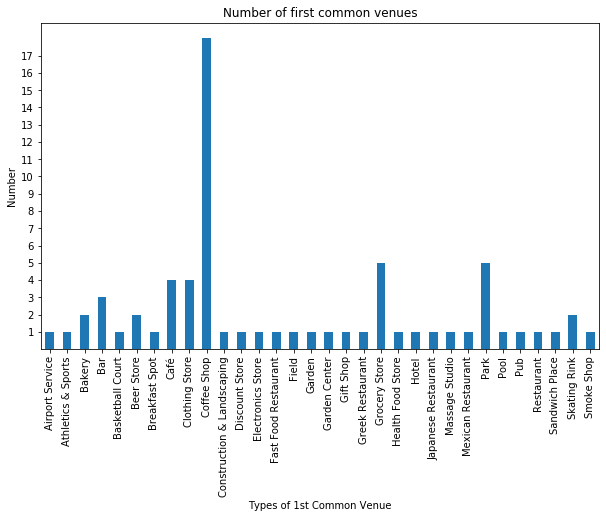

In [127]:
tor_cluster_four =toronto_merged.loc[toronto_merged['Clustered Labels']==4, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]
tor_cluster_four_first = tor_cluster_four['1st Most Common Venue']
tor_cluster_four_first = pd.get_dummies(tor_cluster_four_first)
tor_cluster_four_first = tor_cluster_four_first.sum()
tor_cluster_four_first.plot(kind='bar', figsize=(10,6))
plt.xlabel('Types of 1st Common Venue')
plt.ylabel('Number')
plt.title('Number of first common venues')
plt.yticks(np.arange(tor_cluster_four_first.min(), tor_cluster_four_first.max(), 1))